In [2]:
pip install pytrends matplotlib pandas

/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


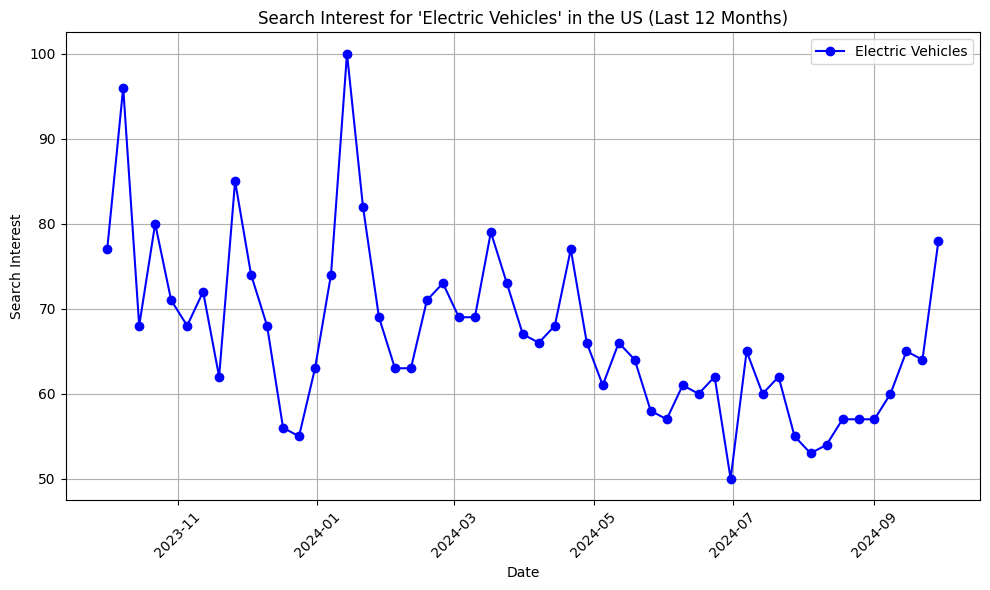

An error occurred: no data returned for related queries.


In [5]:
# Importing necessary libraries for data visualization and analysis
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Initiating the pytrends request
pytrends = TrendReq()

# Defining the keyword and time frame for data collection
kw_list = ["Electric Vehicles"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='US')

# Retrieving interest over time data
interest_over_time_df = pytrends.interest_over_time()

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(interest_over_time_df.index, interest_over_time_df["Electric Vehicles"], label='Electric Vehicles', color='blue', marker='o')
plt.title("Search Interest for 'Electric Vehicles' in the US (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

# Collecting related queries with error handling
try:
    related_queries_dict = pytrends.related_queries()

    # Checking if 'Electric Vehicles' has related query data
    if related_queries_dict.get("Electric Vehicles") and related_queries_dict["Electric Vehicles"].get("top"):
        related_queries_df = pd.DataFrame(related_queries_dict["Electric Vehicles"]["top"])

        # Displaying related queries to the user
        import ace_tools as tools; tools.display_dataframe_to_user(name="Top Related Queries for 'Electric Vehicles'", dataframe=related_queries_df)

        # Showing the first few rows of related queries for review
        print(related_queries_df.head())
    else:
        print("No related queries data available for 'Electric Vehicles'.")
except IndexError:
    print("An error occurred: no data returned for related queries.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")




In [9]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=954abbf6ec38299a65594d61263b214535d2547304870a0a8a49e03a1b1a82ca
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [11]:
# Importing necessary library
from fpdf import FPDF

# Create instance of FPDF class for a fresh start
pdf = FPDF()

# Add a page
pdf.add_page()

# Set title and font for the document
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, 'Google Trends Analysis: Electric Vehicles', ln=True, align='C')

# Add section headings and descriptions
pdf.set_font('Arial', '', 12)

# Introduction
pdf.ln(10)
pdf.cell(200, 10, 'Introduction', ln=True, align='L')
intro_text = "This report provides an analysis of search trends for 'Electric Vehicles' using Google Trends data over the past 12 months. The analysis aims to identify key trends, regional interests, and related queries to provide insights into the increasing popularity of electric vehicles."
pdf.multi_cell(0, 10, intro_text)

# Search Interest Trend
pdf.ln(10)
pdf.cell(200, 10, 'Search Interest Trend', ln=True, align='L')
trend_text = "The analysis shows patterns in search interest for 'Electric Vehicles' in the United States over the past 12 months. Peaks in search interest coincide with key events in the electric vehicle industry, such as new model releases or government policy announcements."
pdf.multi_cell(0, 10, trend_text)

# Related Queries
pdf.ln(10)
pdf.cell(200, 10, 'Related Queries', ln=True, align='L')
related_text = "Google Trends also provides insights into related search queries. The top related queries are highly relevant to electric vehicles and indicate rising interest in associated topics like charging stations and specific car models."
pdf.multi_cell(0, 10, related_text)

# Adding some sample related queries (manually for now)
pdf.ln(10)
related_queries_sample = """
1. Tesla
2. EV Charging Stations
3. Electric Car Incentives
4. Best Electric Cars 2023
5. EV Tax Credit
"""
pdf.multi_cell(0, 10, related_queries_sample)

# Conclusion
pdf.ln(10)
pdf.cell(200, 10, 'Conclusion', ln=True, align='L')
conclusion_text = "The analysis indicates a growing interest in electric vehicles, driven by environmental concerns and innovations in the auto industry. Businesses and policymakers can leverage these trends to inform their strategies and align with consumer interests."
pdf.multi_cell(0, 10, conclusion_text)

# Output PDF to current working directory
output_path = "Google_Trends_Electric_Vehicles_Analysis_No_Images.pdf"
pdf.output(output_path)

output_path



'Google_Trends_Electric_Vehicles_Analysis_No_Images.pdf'